![Scipy Logo](images/scipy_logo2.PNG)

## An Overview of Scipy and Scipy.Stats

__Brendan Ryan GMIT Machine Learning and Statistics Module - December 2021 - G00387831__ 

---

### **Firstly what is SciPy**

SciPy is an open source scientific library for Python which gives us the ability to perform Mathematical, Scientific and Engineering Computations. SciPy also provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations, differential equations, statistics and many other classes of problems..

The SciPy library is built to work with NumPy arrays and provides use with many user-friendly and efficient numerical practices such as routines for numerical integration and optimization. NumPy and SciPy are easy to use, but powerful enough to be used by some of the world's leading scientists and engineers.!!! 

#### **What is SciPy.stats?**

All of the statistics functions of the SciPy library are located in the sub-package named scipy.stats. used for statistical analysis

##### **Uses of SciPy.stats**

From my research I found out that the stats module scipy.stats is a very important feature of SciPy. 

It is useful for obtaining probabilistic distributions. SciPy Stats can generate discrete or continuous random numbers. It also consists of many other functions to generate descriptive statistical values. We can deal with random, continuous, and random variables. It also has functions for working with various types of distributions. 

It offers us the ability to perform a wide range of statistic analysis.

[1] https://scipy.org/

[2] https://www.tutorialspoint.com/scipy/scipy_quick_guide.htm

[3] https://docs.scipy.org/doc/scipy/reference/stats.html

### **Overview of ANOVA Testing**

ANOVA is a means of comparing the ratio of systematic variance to unsystematic variance in an experimental study. Variance in the ANOVA is partitioned into total variance, variance due to groups, and variance due to individual differences.

The ratio obtained when doing this comparison is known as the F-ratio. A one-way ANOVA can be seen as a regression model with a single categorical predictor. This predictor usually has two plus categories. A one-way ANOVA has a single factor with J levels. Each level corresponds to the groups in the independent measures design

Each experimental condition should have roughly the same variance (i.e., homogeneity of variance), the observations (e.g., each group) should be independent, and the dependent variable should be measured on, at least,  an interval scale.
https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/


#### Assumptions 
- Assumption 1: Dependent variable*** -Dependent variable should be measured at the interval or ratio level
- Assumption 2: Independent variable*** - Independent variable should consist of two or more categorical, independent groups.
- Assumption 3: You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves
- Assumption 4: Outliers - There should be no significant outliers.
- Assumption 5: Normality -  Dependent variable should be approximately normally distributed for each category of the independent variable.
- Assumption 6: Homogeneity of Variances - There needs to be homogeneity of variances

I will go through these 6 assumptions below when performing my Anova Testing below on my sample datasets.


#### A word on T - Tests 

T Test  is a statistical significance test that is used to compare the means of two groups and determine if the difference in means is statistically significant.

T-tests are several types of hypothesis testing and are among the most common statistical tests performed in world. Tests include on sample, standard t-Test and paired sample. In general they all follow the same pattern.

Example -  we could use a independent t-test to understand whether first year graduate salaries differed based on gender (i.e., your dependent variable would be "first year graduate salaries" and your independent variable would be "gender", which has two groups: "male" and "female").

##### t-Test demo

I am going to perfrom a demo t-Test oon te grades dataset which is availabel at https://www.sheffield.ac.uk/mash/statistics/datasets. The aim of the test is to is see is the difference in the mean final grade statistically significant per gender (male or female).

_________________

I will start with my imports, importing the standard ones numpy, seaborn, pandss etc and then the Scipy stats library and the t-Test module required

In [1]:
# Numerical arrays.
import numpy as np
# Plotting.
import seaborn as sns
#pandas for dataframes 
import pandas as pd
# Stats scipy stats
import scipy.stats as ss
## scipy stats t-Test
from scipy.stats import ttest_ind
## scipy stats specials
import scipy.special as spec

##import collections
import collections as co
#magic script for plots
%matplotlib inline

Next i will import in my test datasets - this will be the Grades Dataset and will import it using pandas as a data frame

In [2]:
#import in my dataset
df_grades = pd.read_csv('datasets/grades/exam_grades.csv')

In [3]:
df_grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            232 non-null    int64  
 1   sex           232 non-null    object 
 2   exam1         232 non-null    float64
 3   exam2         232 non-null    float64
 4   exam3         232 non-null    float64
 5   course_grade  232 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 11.0+ KB


In [4]:
#to convert gender to a cateogroy rather than object
df_grades["sex"] = df_grades["sex"].astype("category")
sex = df_grades["sex"]
course_grade = df_grades['course_grade']

Next i will give a visual representation of my categories using a catplot and box plot from the seaborn plotting library
links to catplot and box plot 

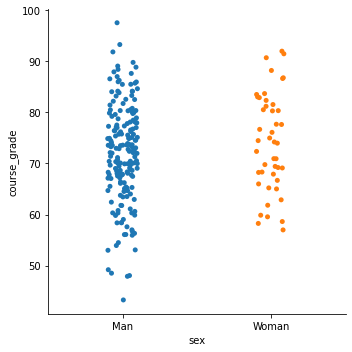

In [5]:
sns.catplot(x ='sex', y ='course_grade',jitter=True ,data=df_grades);

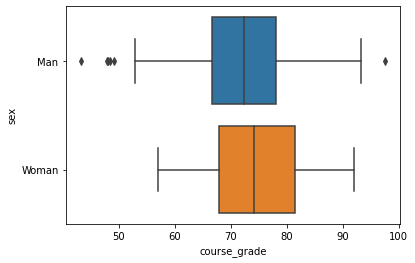

In [6]:
sns.boxplot(x = df_grades['course_grade'], y =df_grades['sex']);

Ok so we can see from above that there is a bigger spread of results for males with some outliers showing on the box plot. However both plots are showing the mean is in around 73 to 75 so i would imagine the result of my t-Test to show that there no statistical significance in the difference of the mean grade - lets see...........

__Null hypothesis__
All statistical tests have a null hypothesis. For most tests, the null hypothesis is that there is no relationship between your variables of interest or that there is no difference among groups.

__The P Value__

https://www.scribbr.com/statistics/p-value/

The p-value, or probability value, tells you how likely it is that your data could have occurred under the null hypothesis.
The p-value tells you how often you would expect to see a test statistic as extreme or more extreme than the one calculated by your statistical test if the null hypothesis of that test was true. The p-value gets smaller as the test statistic calculated from your data gets further away from the range of test statistics predicted by the null hypothesis.
The p-value is a proportion: if your p-value is 0.05, that means that 5% of the time you would see a test statistic at least as extreme as the one you found if the null hypothesis was true.


![image](https://th.bing.com/th/id/R.470e9336f6c1b6ade719d9dd809a251e?rik=alXMZh6%2f7Zrk%2fg&riu=http%3a%2f%2fdsm1lp.files.wordpress.com%2f2012%2f02%2f2008_03_10_null_hypothesis.jpg&ehk=gmv1erPErrMTRVjyiXJV6IOoN4PJUUSaPo7cBsDBuLw%3d&risl=&pid=ImgRaw&r=0)

Image thanks to - Bing search Null Hypothesis

### Running the t-Test

In [7]:
#define my two groups
male_group = df_grades.loc[df_grades["sex"] =='Man',"course_grade"]
female_group = df_grades.loc[df_grades["sex"] =='Woman', "course_grade"]
#run my t test using ttest_ind from scipy stats
t_ss, p_ss = ss.ttest_ind(male_group,female_group)
print(f"t-value: {t_ss}\tp-value: {p_ss}")
#round to 2 decimal 
print(f"P_scipy: {p_ss:0.2f}")

t-value: -1.421028169981253	p-value: 0.15666292284818942
P_scipy: 0.16


__Ok so what does our values tell us__

In our  comparison of final course grades per gender groups our p-value is .16 or 16% , above our threshold value of 0.05; therefore we can determine that there is NO statistically significant difference final grades between the gender groups male and female. 

This is an interesting post where the opposite was the finding and there as a statistical significance between the gender groups - https://www.southampton.ac.uk/passs/gcse_scores/bivariate_analysis/t_test.page

So what if I had 3 groups that needed testing?

We learnt from the lectures that using more than 2 groups for t tests is a bad idea (like 3 t tests) - the chance that you will get an error in your analysis becomes unpredictable and will result in artificially low p-values and lets you overestimate the significance of the difference between groups, , using ANOVA testing is then better as we only need to run one test.

For demo and comparison im going to run a one way ANOVA test which is covered in the next section to see what score we get and will compare further on

In [8]:
F,P = ss.f_oneway(male_group,female_group)
print(f"{P:.2f}")

0.16


________

## __ANOVA__

__ANOVA__, which stands for __Analysis of Variance__, is a statistical test used to analyze the difference between the means of more than two groups.

A one-way ANOVA uses one independent variable, while a two-way ANOVA uses two independent variables.

- The null hypothesis of ANOVA is that there is no difference among group means. - 
- The alternate hypothesis is that at least one group differs significantly from the overall mean of the dependent variable.

## Demonstrations of Anova

### Exploring the dataset - work data

For my demonstrations i am going to use a work dataset that i extracted using our BI tool pentaho. 
My aim is to check for statistical differences between the amounts borrowed for personal loans up to 6,000 (dependent variable) and my independent variabales. We are looking at introducing a new revolving credit loan with a maximum value of 6,000. The results could be useful from a rollout and marketing viewpoint.
- per demographic category (one way anova)
- per demographic cateogory and loan category (two way anova)

Firstly import my data

In [9]:
#import dataset
df = pd.read_csv('datasets/work/work_data.csv')
#display daframe
df

,Demographic_Category,Loan Category,Loan_Amount_Issued
0,YOUNG SINGLE,PERSONAL,6000.0
1,YOUNG SINGLE,PERSONAL,6000.0
2,YOUNG SINGLE,PERSONAL,6000.0
3,YOUNG SINGLE,PERSONAL,6000.0
4,YOUNG SINGLE,PERSONAL,6000.0
...,...,...,...
1928,OVER 65s,PERSONAL,500.0
1929,OVER 65s,PERSONAL,500.0
1930,OVER 65s,PERSONAL,500.0
1931,OVER 65s,PERSONAL,500.0


__Tidy Data__
This dataset is very clean as it has been manipulated and extracted using a BI tool removing empty values etc - this may not always be the case with a real world dataset

Exploring our data further with pandas tools df.head and df.describe - lets see what we have to work with

In [10]:
#display on screen first 5 rows
df.head()

,Demographic_Category,Loan Category,Loan_Amount_Issued
0,YOUNG SINGLE,PERSONAL,6000.0
1,YOUNG SINGLE,PERSONAL,6000.0
2,YOUNG SINGLE,PERSONAL,6000.0
3,YOUNG SINGLE,PERSONAL,6000.0
4,YOUNG SINGLE,PERSONAL,6000.0


In [11]:
#show a tabular discription of the dataset
df.describe()

,Loan_Amount_Issued
count,1933.000000
mean,2254.593978
std,1645.525404
min,500.000000
25%,1000.000000
50%,1800.000000
75%,3000.000000
max,6000.000000


In [12]:
df.groupby(by = "Demographic_Category").count()

,Loan Category,Loan_Amount_Issued
Demographic_Category,,
ADULT SINGLE,196,196
OVER 50s,466,466
OVER 65s,335,335
SINGLE PARENT,325,325
YOUNG FAMILY,235,235
YOUNG SINGLE,376,376


The 6 demographic cateogories above have already been extracted and assinged by based on the applicants lifestage or circumstance.

### One way ANOVA

#### Assumptions

When we choose to analyse our data using a one-way ANOVA, part of the process involves checking to make sure that the data we want to analyse can actually be analysed using a one-way ANOVA. We need to do this because it is only appropriate to use a one-way ANOVA if our data "passes" six assumptions that are required for a one-way ANOVA to give you a valid result.
[https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php]

______________

***Assumption 1: Dependent variable***

Dependent variable should be measured at the interval or ratio level.

In [13]:
# Loam Amount Issued is The dependent variable.
#df["Loan_Amount_Issued"] = df.Loan_Amount_Issued.astype(float)
dependent = df['Loan_Amount_Issued']
x = dependent
x

0       6000.0
1       6000.0
2       6000.0
3       6000.0
4       6000.0
         ...  
1928     500.0
1929     500.0
1930     500.0
1931     500.0
1932     500.0
Name: Loan_Amount_Issued, Length: 1933, dtype: float64

Yes we can be happy that assumption 1 is satisfied and our data is at/in numerical intervals 

________________

***Assumption 2: Independent variable***

Independent variable should consist of two or more categorical, independent groups.

In [14]:
# Independent variable.
independent = df['Demographic_Category']
independent
#use grouby and get count of each gender in dataset
df.groupby(by = "Demographic_Category").count()

,Loan Category,Loan_Amount_Issued
Demographic_Category,,
ADULT SINGLE,196,196
OVER 50s,466,466
OVER 65s,335,335
SINGLE PARENT,325,325
YOUNG FAMILY,235,235
YOUNG SINGLE,376,376


Pass -So for my first test one way anova we are going to use the demographic category as my dependent variable which has seven independent groups as required 

_______________________________

**Assumption 3:**

You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves

Pass - age demographic has to fit into one of the categories - you cant have two ages

______________

***Assumption 4: Outliers***

There should be no significant outliers.

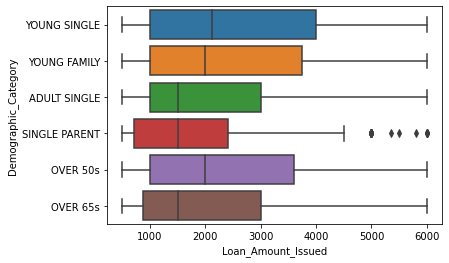

In [15]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x=dependent, y=independent)

Pass - There is a few "stray" values but im happy the majority of the values/counts are withing the required ranges and will proceed.

_______________

***Assumption 5: Normality***

Dependent variable should be approximately normally distributed for each category of the independent variable.

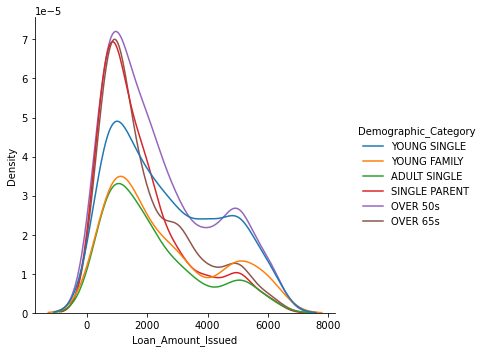

In [16]:
# KDEs of the three categories.

# KDEs of the three categories.
sns.displot(x=dependent, hue=independent, kind="kde")

In [17]:
print ("Young Single Shapiro Result:")
test_shapiro = dependent[independent == 'YOUNG FAMILY']
ss.shapiro(test_shapiro)

Young Single Shapiro Result:


ShapiroResult(statistic=0.8684596419334412, pvalue=2.3879262824912095e-13)

In [18]:
print ("Young Single Shapiro Result:")
test_shapiro = dependent[independent == 'OVER 50s']
ss.shapiro(test_shapiro)

Young Single Shapiro Result:


ShapiroResult(statistic=0.8836050629615784, pvalue=2.9057121975604564e-18)

Ok so we have some curves - bell shaped to a degree. I have run the shapiro test on a few of my groups and the results are not promising ....

To be honest this is real world data and to expect it to have a perfect normal distribution would not appear normal to me but maybe thats the wrong way of looking at this

I will continue however....

_______________

***Assumption 6: Homogeneity of Variances***

There needs to be homogeneity of variances

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

In [19]:
# Test for equal variances.
ss.levene(

    dependent[independent == 'YOUNG SINGLE'],
    dependent[independent == 'YOUNG FAMILY'],
    dependent[independent == 'ADULT SINGLE'],
    dependent[independent == 'SINGLE PARENT'],
    dependent[independent == 'OVER 50s'],
    dependent[independent == 'OVER 65s'],
)

LeveneResult(statistic=9.005794604852767, pvalue=1.7947369758180297e-08)

Ok so we were able to run levenes test for Homogeneity of Variances and the result is not good - a small P Value like we have in my case suggests that the populations do not have equal variances 
so my assumptions 4 and 6 are not good - will continue for my own learning process and run seperate anova on another dataset as well 

Although my result is not favourable i have to remember it was run on multiple groups -  6 in total - might be cheating but I may be only intereseted in running this test with only 3 groups - lets see what happens

In [20]:
# Test for equal variances.
ss.levene(

    dependent[independent == 'YOUNG SINGLE'],
    dependent[independent == 'YOUNG FAMILY'],
    dependent[independent ==  'OVER 50s']

)

LeveneResult(statistic=1.2621310449511487, pvalue=0.2834696692909791)

Interesting result in that our p value is now 0.28 well above the threshold of 0.05 and would pass this levene 
test 

## Performing a One Way Anova on my sample work dataset

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

In [21]:
# ANOVA.
ss.f_oneway(
    dependent[independent == 'YOUNG SINGLE'],
    dependent[independent == 'YOUNG FAMILY'],
    dependent[independent == 'ADULT SINGLE'],
    dependent[independent == 'SINGLE PARENT'],
    dependent[independent == 'OVER 50s'],
    dependent[independent == 'OVER 65s'],
    )

F_onewayResult(statistic=12.199381414505334, pvalue=1.1600654561077999e-11)

__Conclusion__

The mean borrowing amounts of my various demographics are different - Tiny P value we should reject the Null hypothesis

____________

__Further testing__
As above with Levens test what if i was only interested in 3 groups rather than 6 (might be cheating a little as i know from my previous box plot the means look promising)

In [22]:
# ANOVA.
ss.f_oneway(
    dependent[independent == 'YOUNG SINGLE'],
    dependent[independent == 'YOUNG FAMILY'],
    dependent[independent == 'OVER 50s'],
    
    )

F_onewayResult(statistic=2.1113956955596627, pvalue=0.12157113509488456)

Ok so my ANNOVA one way test result of 0.12 shows that there is __NO__ statistical difference in the mean of the loan amounts applied for in the above demographics

In [23]:
# ANOVA.
ss.f_oneway(
    dependent[independent == 'OVER 50s'],
    dependent[independent == 'OVER 65s'],
    )

F_onewayResult(statistic=12.072160046159535, pvalue=0.0005393694005889853)

We can see that the significance value is 0.0005  which is below 0.05. and, therefore, there __IS__  a statistical significant difference in the mean loan amounts applied for. I found this suprising i thought there wouldnt be and that the means would be similar but as show by the box plot above as well there is and statistically the amounts applied for over 65s match more closely with single adults and single parents as show below with a p-value of  0.0586 just above my threshold.

In [24]:
# ANOVA.
ss.f_oneway(
    dependent[independent == 'ADULT SINGLE'],
    dependent[independent == 'SINGLE PARENT'],
    dependent[independent == 'OVER 65s'],
    )

F_onewayResult(statistic=2.853286830785751, pvalue=0.05820494657536651)

#### PERFORMING WELCH ANOVA

If assumption 6 fails we can carry out a WELCH ANOVA test which is an open course code contributed to the scipy.stats github repository - copied from below

Unequal Variances

https://github.com/scipy/scipy/issues/11122#issuecomment-587964214

In [25]:
def welch_anova_np(*args, var_equal=False):
    # https://svn.r-project.org/R/trunk/src/library/stats/R/oneway.test.R
    # translated from R Welch ANOVA (not assuming equal variance)

    F_onewayResult = co.namedtuple('F_onewayResult', ('statistic', 'pvalue'))

    args = [np.asarray(arg, dtype=float) for arg in args]
    k = len(args)
    ni = np.array([len(arg) for arg in args])
    mi = np.array([np.mean(arg) for arg in args])
    vi = np.array([np.var(arg,ddof=1) for arg in args])
    wi = ni/vi

    tmp =sum((1-wi/sum(wi))**2 / (ni-1))
    tmp /= (k**2 -1)

    dfbn = k - 1
    dfwn = 1 / (3 * tmp)

    m = sum(mi*wi) / sum(wi)
    f = sum(wi * (mi - m)**2) /((dfbn) * (1 + 2 * (dfbn - 1) * tmp))
    prob = spec.fdtrc(dfbn, dfwn, f)   # equivalent to stats.f.sf
    return F_onewayResult(f, prob)

In [26]:
# Perform the test.
welch_anova_np(
    dependent[independent == 'YOUNG SINGLE'],
    dependent[independent == 'YOUNG FAMILY'],
    dependent[independent == 'ADULT SINGLE'],
    dependent[independent == 'SINGLE PARENT'],
    dependent[independent == 'OVER 50s'],
    dependent[independent == 'OVER 65s'],
)

F_onewayResult(statistic=12.878332214891223, pvalue=4.578209746553461e-12)

Conclusion -Our earlier assumption is correct - the test returned an extremely low pValue - the difference in the means of our demographic groups are statistically significant. 

_________

## Post Hoct Test

ANOVA tests tell us whether we have an overall difference between your groups, but it does not tell us which specific groups differed – post hoc tests do. Because post hoc tests are run to confirm where the differences occurred between groups, they should only be run when you have a shown an overall statistically significant difference in group means (i.e., a statistically significant one-way ANOVA result).

As our data did not meet the homogeneity of variances assumption, you should consider running the Games Howell post hoc test as per recomendations  
- https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-4.php


## Games Howell Test

https://pingouin-stats.org/generated/pingouin.pairwise_gameshowell.html
    
#pingouin.pairwise_gameshowell

In [27]:
import pingouin as pg
pg.pairwise_gameshowell(data=df, dv='Loan_Amount_Issued',between='Demographic_Category').round(3)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,ADULT SINGLE,OVER 50s,2140.859,2381.063,-240.204,135.624,-1.771,399.094,0.486,-0.151
1,ADULT SINGLE,OVER 65s,2140.859,1979.203,161.656,137.407,1.176,396.701,0.829,0.106
2,ADULT SINGLE,SINGLE PARENT,2140.859,1825.024,315.834,135.579,2.330,382.669,0.185,0.210
3,ADULT SINGLE,YOUNG FAMILY,2140.859,2488.973,-348.115,160.013,-2.176,428.109,0.251,-0.210
4,ADULT SINGLE,YOUNG SINGLE,2140.859,2627.319,-486.461,142.394,-3.416,437.895,0.009,-0.301
5,OVER 50s,OVER 65s,2381.063,1979.203,401.860,113.290,3.547,766.880,0.006,0.254
6,OVER 50s,SINGLE PARENT,2381.063,1825.024,556.038,111.065,5.006,764.074,0.001,0.361
7,OVER 50s,YOUNG FAMILY,2381.063,2488.973,-107.911,139.850,-0.772,451.344,0.900,-0.062
8,OVER 50s,YOUNG SINGLE,2381.063,2627.319,-246.256,119.290,-2.064,793.962,0.307,-0.143
9,OVER 65s,SINGLE PARENT,1979.203,1825.024,154.178,113.236,1.362,657.630,0.723,0.106


The above table lets us analyise further the means of each group within the demographic independent variable and the corresponding pValue 

examples 
Young Family - Young Single - pValue 0.90 - means of amounts issued very similar - no statiscally significance 
Over 50s - Single Parent - pVale 0.001 - - statisficaly significant differnce in the means of loans amount issued


_____________

## Perform One way Anova on my Grades Dataset

I already have my grades dataset loaded in so we will can just review as df_grades

In [28]:
#display dataframe
df_grades

,ID,sex,exam1,exam2,exam3,course_grade
0,1,Man,84.5000,69.5,86.5000,76.2564
1,2,Man,80.0000,74.0,67.0000,75.3882
2,3,Man,56.0000,70.0,71.5000,67.0564
3,4,Man,64.0000,61.0,67.5000,63.4538
4,5,Man,90.5000,72.5,75.0000,72.3949
...,...,...,...,...,...,...
227,228,Man,98.2143,89.1,71.1111,85.5208
228,229,Woman,95.0000,86.0,78.3333,83.6959
229,230,Man,97.1429,53.5,67.2222,72.1189
230,231,Man,85.0000,63.0,75.0000,67.1996


### **Assumptions**

________________

***Assumption 1: Dependent variable***

Dependent variable should be measured at the interval or ratio level.

In [29]:
# Course grade is The dependent variable.
dependent2 = df_grades['course_grade']
x = dependent2
x

0      76.2564
1      75.3882
2      67.0564
3      63.4538
4      72.3949
        ...   
227    85.5208
228    83.6959
229    72.1189
230    67.1996
231    66.4035
Name: course_grade, Length: 232, dtype: float64

Passed grades are mesasured at numerical intervals from 0 - 100

________________

***Assumption 2: Independent variable***

Independent variable should consist of two or more categorical, independent groups.

In [30]:
# Independent variable.
independent2 = df_grades['sex']
independent2
#use grouby and get count of each gender in dataset
df_grades.groupby(by = "sex").count()

,ID,exam1,exam2,exam3,course_grade
sex,,,,,
Man,187,187,187,187,187
Woman,45,45,45,45,45


Check - Independent variable will be gender - male or female

_________________

**Assumption 3:**

You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves

Pass- gender has to be either male or female

___________

***Assumption 4: Outliers***

There should be no significant outliers.

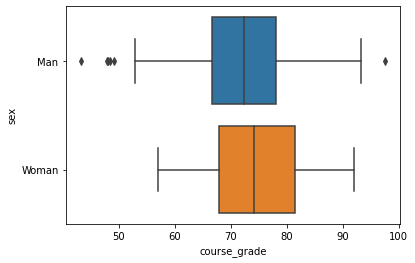

In [31]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x=dependent2, y=independent2)

Pass - We can note from above there is some outliers for male but should not be significant enough to affect our anova, this can be seen with the outliers shows as diamond symbols -  further testing to see ...

______________

***Assumption 5: Normality***

Dependent variable should be approximately normally distributed for each category of the independent variable.

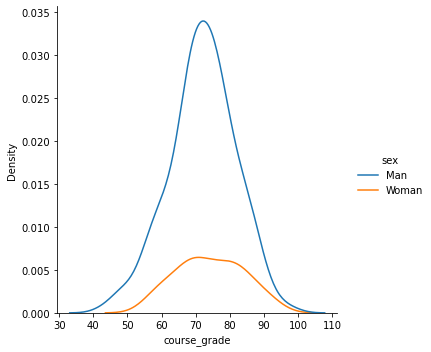

In [32]:
# KDEs of the three categories.

# KDEs of the three categories.
sns.displot(x=dependent2, hue=independent2, kind="kde")

We can see from plot above both the dependent variable "grade" for each gender can be classed as normally distributed

____________

***Assumption 6: Homogeneity of Variances***

There needs to be homogeneity of variances

In [33]:
# Test for equal variances.
ss.levene(
    dependent2[independent2 == 'Man'],
    dependent2[independent2 == 'Woman'],
    )

LeveneResult(statistic=0.23917437035338962, pvalue=0.6252690966953789)

Ok so we were able to run levenes test for Homogeneity of Variances and the result is good for conducting our one way anova - the result is a high P Value which suggest populations do have equal varinances.

_____________

### Perform One-way ANOVA

In [34]:
# ANOVA.
ss.f_oneway(
    dependent2[independent2 == 'Man'],
    dependent2[independent2 == 'Woman'],
    )

F_onewayResult(statistic=2.019321059880278, pvalue=0.15666292284819547)

__Grades Dataset ANNOVA One Way Finding and Conclusion__ - 

If a p-value reported from a t test is less than 0.05, then that result is said to be statistically significant. If a p-value is greater than 0.05, then the result is insignificant.

In our __ANNOVA__ one way test of final course grades per gender groups our p-value is .16 or 16% , above our threshold value of 0.05; therefore we can determine that there is NO statistically significant difference in the final grade between the gender groups male and female. This is an interest post where the opposite was the finding and there as a statistical significance between the gender groups - https://www.southampton.ac.uk/passs/gcse_scores/bivariate_analysis/t_test.page

Our p value of .16 matches the T test p value of .16 performed earlier so in the case of two groups either test would be appropriate  (t-Test recommended for 2 groups) where as the ANNOVA test can be further used where there is 3 or more groups per variable or a two way ANNOVA when there is two or more independent variables.

__________

### Conclusion

Found scipy stats and the concepts t-Tests and ANOVA very hard to grasp at the start but the project has helped me loads. I hope to start testing more of my work data using the tools learnt to date.

Some of the results obtained using my work dataset where a little suprising

Going forward I feel I need to explore testing on categorial variables a bit more and the whole area of one hot encoding etc which will be very useful 

Thanks

Brendan


__________

### References and Research

#### Scipy and Scipy.stats

[1] Offical SciPy website - https://scipy.org/

[2] Tutroialspoint SciPy quick guide:- https://www.tutorialspoint.com/scipy/scipy_quick_guide.htm

[3] Offical SciPy stats refernce website - https://docs.scipy.org/doc/scipy/reference/stats.html


#### Anova Testing - T Tests 

[4] Four Ways to Conduct One-Way ANOVA with Python - Erik Marsja - https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/

[5] Exploratory Data Analysis in Python - GeeksforGeeks - https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/

[6] Anova Testing - https://www.analyticsvidhya.com/blog/2020/06/introduction-anova-statistics-data-science-covid-python/

[7] The P Value - https://www.scribbr.com/statistics/p-value/

[8] Assumption 6: Homogeneity of Variances - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

[9] ANOVA Test: Definition, Types, Examples, SPSS - Statistics How To - https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/anova/

[10] Anova test Southhamption Academic -  https://www.southampton.ac.uk/passs/gcse_scores/bivariate_analysis/t_test.page


#### Homogeneity of Variances

[11] Leven Test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

[12] https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php

[13] Welch Anova - https://github.com/scipy/scipy/issues/11122#issuecomment-587964214

[14] Games Howell Test - https://pingouin-stats.org/generated/pingouin.pairwise_gameshowell.html

#### Plotting 

[15] Boxplot - https://seaborn.pydata.org/generated/seaborn.boxplot.html

[16] Cat Plot - https://seaborn.pydata.org/generated/seaborn.catplot.html

####  Other 

[17] Pandas Group By: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

[18] Basic Syntax Markdown - https://www.markdownguide.org/basic-syntax/

[19] Requirements.txt - https://www.idkrtm.com/what-is-the-python-requirements-txt/

[20] Grades dataset - https://www.sheffield.ac.uk/mash/statistics/datasets

# END